In [12]:
import numpy as np
import simulate
import matplotlib.pyplot as plt
import pdb

# default params
m1 = 0.5 # mass 1 (msun)
m2 = 0.25 # mass 2 (msun)
P0 = 0.005 # period (days)
Pdot = 1e-11 # abs rate of change of period (days/days)
freq_0 = 2/P0/(60*60*24) # quadrupole radiation in hertz (twice the freq of the source)


In [13]:
# constants
G = 6.67e-11 # grav constant (m^3/kg/s^2)
msun = 1.989e30 # solar mass (kg)
c = 299792458 # speed of light (m/s)

def mchirp(m1,m2): 
    return (m1*m2)**(3/5.)/(m1+m2)**(1/5.)

def time_to_coalescence(f0, m1, m2=None):
    """
    INPUTS:
            f0 = starting frequency in hertz
            
            m1 = mass of star 1 in kg
            
            m2 = mass of star 2 in kg (If None, m1 assumed to be mchirp)
            
    OUTPUTS:
            freqs = frequency array in hertz (nan after coalescence)
            
    """
    if m2 is None:
        mc = m1
    else:
        mc = mchirp(m1,m2)
    return 5./256. * (np.pi*f0)**(-8/3) * (G*mc/c**3)**(-5/3)


def freqqs(times, m1,m2, f0):
    """
    INPUTS:
            times = time array in seconds
            
            m1 = mass of star 1 in kg
            
            m2 = mass of star 2 in kg
            
            f0 = starting frequency in hertz
    OUTPUTS:
            freqs = frequency array in hertz (nan after coalescence)
            
    """
    tcoal= time_to_coalescence(f0,m1,m2)

    times= tcoal-times
    
    freqs=1/np.pi*(5/256./times)**(3/8.)*(G*mchirp(m1,m2)/c**3)**(-5/8.)
    
    return freqs


def pdot_phasefold(times, P, Pdot, t0=0):
    """
    @author: kburdge
       
    Function which returns phases corresponding to timestamps in a lightcurve 
    given a period P, period derivative Pdot, and reference epoch t0
    
    If no reference epoch is supplied, reference epoch is set to earliest time in lightcurve
    
    INPUTS:
            times = time array (days)
            
            P = starting period
            
            Pdot = rate of change of period in units of time/time (days/day)
            
            t0 = start time
            
    OUTPUTS:
            phases = phases for given time array, period, and Pdot
    
    """
    
    if t0==0:
            times=times-np.min(times)
    else:
            times=times-t0
    
    phases=((times-1/2*Pdot/P*(times)**2))
    
    return phases

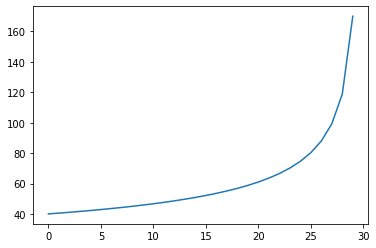

In [14]:
times = np.arange(30)
#testing for ~GW170817 params
plt.plot(times,freqqs(times, 1.36*msun, 1.17*msun,f0=40))

In [15]:
time=simulate.time()
pdot_f=pdot_phasefold(time, P0, Pdot)
frequency_series=freqqs(time*60*60*24, 0.5*msun, 0.25*msun,f0=freq_0)

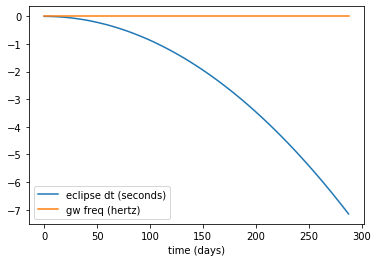

In [16]:
plt.plot(time,(pdot_f-time)*86400,label="eclipse dt (seconds)")
plt.plot(time,frequency_series,label="gw freq (hertz)")
plt.xlabel("time (days)")
plt.legend()


In [17]:
np.savetxt("phase_freq.dat",np.array([time,(pdot_f-time)*86400,frequency_series]).T, header = 'time(days) eclipse_dt(seconds) gw_freq(hertz)')